In [0]:
print ("Et tumor Brute?")

Et tumor Brute?

In [0]:
%run "./config"

In [0]:
data_folder_path

Out[82]: '/mnt/1stdatalake/data'

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType,  DoubleType

In [0]:
data_schema=StructType(fields=[StructField("Image",StringType(), False),
                                   StructField("Class",IntegerType(), False),
                                   StructField("Mean",DoubleType(), True),
                                   StructField("Variance",DoubleType(), True),
                                   StructField("Standard Deviation",DoubleType(), True),
                                   StructField("Entropy",DoubleType(), True),
                                   StructField("Skewness",DoubleType(), True),
                                   StructField("Kurtosis",DoubleType(), True),
                                   StructField("Contrast",DoubleType(), True),
                                   StructField("Energy",DoubleType(), True),
                                   StructField("ASM",DoubleType(), True),
                                   StructField("Homogeneity",DoubleType(), True),
                                   StructField("Dissimilarity",DoubleType(), True),
                                   StructField("Correlation",DoubleType(), True),
                                   StructField("Coarseness",DoubleType(), True),

                          
                                  ])

In [0]:
input_df=spark.read\
.option("header",True) \
.schema(data_schema) \
.csv(f"{data_folder_path}/Brain Tumor.csv")

In [0]:
base_df=input_df
base_df.show()

+-------+-----+----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-----------------+--------------------+
 Image|Class| Mean| Variance|Standard Deviation| Entropy| Skewness| Kurtosis| Contrast| Energy| ASM| Homogeneity| Dissimilarity| Correlation| Coarseness|
+-------+-----+----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-----------------+--------------------+
 Image1| 0|6.53533935546875|619.587844574841| 24.891521539971|0.109059009370733|4.27647702615029|18.9005747905553|98.6139705882353|0.293314496659804|0.086033393950794|0.530941131652007|4.47334558823529|0.981938696883038|7.45834073119875E...|
 Image2| 0|8.74996948242188|805.957633995078| 28.3893929839135|0.266538306720193|3.71811562576237|14.4646175387718|63.8588158750813|0.475051295953323|0.225673733786932|0.651352027489261|3.22007156798959|0.988834395612519|7.45834073119875E...|
 Image3| 1|7.34109497070313|1143.80821918438| 33.8202338724081|0.001466811014785|5.06175041156417|26.4795631645533|81.8672059319178|0.031916712116093|0.001018676512302|0.268274889054872|5.98179979777553|0.978013692812984|7.45834073119875E...|
 Image4| 1|5.95814514160156|959.711984907359| 30.9792185974301|0.001477124416674|5.67797740882281|33.4288453356089|151.229741019215|0.032023748977051|0.001025520498545|0.243850913161766|7.70091896407686|0.964189183043956|7.45834073119875E...|
 Image5| 0|7.31523132324219|729.540578978274| 27.0100088666826|0.146760595840014|4.28322090823909|19.0791082932465|174.988755980861|0.343849413865669|0.118232419415764|0.501139540186341|6.83468899521531|0.972788726424128|7.45834073119875E...|
 Image6| 0|7.52410888671875|607.395257778402| 24.6453901932674|0.214085625648148| 3.7298861207408|14.4717360547478|105.077881619938| 0.42158745340618|0.177735980869508|0.598169203005808|4.19314641744548|0.976484963476823|7.45834073119875E...|
 Image7| 0|12.3044128417969|922.746137739561| 30.376736785566|0.128833098715211| 2.9300947326401|8.96934763269485|115.203118415508|0.320674560600768|0.102832173816496|0.532292452741065| 4.8803202697008|0.974745237490247|7.45834073119875E...|
 Image8| 0|15.9294738769531|1069.95024757066| 32.7100939706792|0.107657590137778|2.48400219180961|6.51588946409096|94.8742884250474|0.291321372548541|0.084868142103566|0.532261672519743| 4.2420540796964|0.976774223350244|7.45834073119875E...|
 Image9| 0|19.9216156005859|1166.12092201469| 34.1485127350326|0.094975456825205|2.12917301078744|4.90584417633038|93.8189200947455|0.272485776142609| 0.07424849820004|0.526643665810971|4.02716681974187|0.974310317140636|7.45834073119875E...|
Image10| 1| 8.4761962890625| 1095.7851273195| 33.1026453220811|0.003001891105522|4.36499992307425|19.6825136630962|72.5887826961771| 0.04568508107728|0.002087126633038|0.361431638579309|4.59079476861167|0.967829699641667|7.45834073119875E...|
Image11| 1|9.80461120605469|1114.82965293078| 33.3890648705647|0.002436208884111|3.87272769515841|15.5528616320745|66.2854623824451|0.041140002024915| 0.00169249976661|0.375617667940156|4.62676332288401|0.968749847385631|7.45834073119875E...|
Image12| 1|12.3267822265625| 1150.6771443364| 33.9216323949246|0.003768576062697|3.62397773230122|14.7622698995657| 165.48479064774|0.051321049752206|0.002633850147668|0.385291640705322|5.21543600143147|0.958601276832679|7.45834073119875E...|
Image13| 1|10.1934661865234|813.924363430001| 28.5293596743776|0.009774474664878| 3.3591346679549|12.1816695073899|110.568642951252|0.083283924590368|0.006936212095174|0.470426405236625|3.56679841897233| 0.94688413919156|7.45834073119875E...|
Image14| 0|7.15631103515625|413.438221306825| 20.3331803047832|0.081825463381282|3.17978135268035|10.2873465883758|122.402663706992|0.250908148623068|0.062954899045456|0.583888568925053|3.55249

In [0]:
display(base_df)

Image Class Mean Variance Standard Deviation Entropy Skewness Kurtosis Contrast Energy ASM Homogeneity Dissimilarity Correlation Coarseness Image1 0 6.53533935546875 619.587844574841 24.891521539971 0.109059009370733 4.27647702615029 18.9005747905553 98.6139705882353 0.293314496659804 0.086033393950794 0.530941131652007 4.47334558823529 0.981938696883038 7.45834073119875E-155 Image2 0 8.74996948242188 805.957633995078 28.3893929839135 0.266538306720193 3.71811562576237 14.4646175387718 63.8588158750813 0.475051295953323 0.225673733786932 0.651352027489261 3.22007156798959 0.988834395612519 7.45834073119875E-155 Image3 1 7.34109497070313 1143.80821918438 33.8202338724081 0.001466811014785 5.06175041156417 26.4795631645533 81.8672059319178 0.031916712116093 0.001018676512302 0.268274889054872 5.98179979777553 0.978013692812984 7.45834073119875E-155 Image4 1 5.95814514160156 959.711984907359 30.9792185974301 0.001477124416674 5.67797740882281 33.4288453356089 151.229741019215 0.032023748977051 0.001025520498545 0.243850913161766 7.70091896407686 0.964189183043956 7.45834073119875E-155 Image5 0 7.31523132324219 729.540578978274 27.0100088666826 0.146760595840014 4.28322090823909 19.0791082932465 174.988755980861 0.343849413865669 0.118232419415764 0.501139540186341 6.83468899521531 0.972788726424128 7.45834073119875E-155 Image6 0 7.52410888671875 607.395257778402 24.6453901932674 0.214085625648148 3.7298861207408 14.4717360547478 105.077881619938 0.42158745340618 0.177735980869508 0.598169203005808 4.19314641744548 0.976484963476823 7.45834073119875E-155 Image7 0 12.3044128417969 922.746137739561 30.376736785566 0.128833098715211 2.9300947326401 8.96934763269485 115.203118415508 0.320674560600768 0.102832173816496 0.532292452741065 4.8803202697008 0.974745237490247 7.45834073119875E-155 Image8 0 15.9294738769531 1069.95024757066 32.7100939706792 0.107657590137778 2.48400219180961 6.51588946409096 94.8742884250474 0.291321372548541 0.084868142103566 0.532261672519743 4.2420540796964 0.976774223350244 7.45834073119875E-155 Image9 0 19.9216156005859 1166.12092201469 34.1485127350326 0.094975456825205 2.12917301078744 4.90584417633038 93.8189200947455 0.272485776142609 0.07424849820004 0.526643665810971 4.02716681974187 0.974310317140636 7.45834073119875E-155 Image10 1 8.4761962890625 1095.7851273195 33.1026453220811 0.003001891105522 4.36499992307425 19.6825136630962 72.5887826961771 0.04568508107728 0.002087126633038 0.361431638579309 4.59079476861167 0.967829699641667 7.45834073119875E-155 Image11 1 9.80461120605469 1114.82965293078 33.3890648705647 0.002436208884111 3.87272769515841 15.5528616320745 66.2854623824451 0.041140002024915 0.00169249976661 0.375617667940156 4.62676332288401 0.968749847385631 7.45834073119875E-155 Image12 1 12.3267822265625 1150.6771443364 33.9216323949246 0.003768576062697 3.62397773230122 14.7622698995657 165.48479064774 0.051321049752206 0.002633850147668 0.385291640705322 5.21543600143147 0.958601276832679 7.45834073119875E-155 Image13 1 10.1934661865234 813.924363430001 28.5293596743776 0.009774474664878 3.3591346679549 12.1816695073899 110.568642951252 0.083283924590368 0.006936212095174 0.470426405236625 3.56679841897233 0.94688413919156 7.45834073119875E-155 Image14 0 7.15631103515625 413.438221306825 20.3331803047832 0.081825463381282 3.17978135268035 10.2873465883758 122.402663706992 0.250908148623068 0.062954899045456 0.583888568925053 3.55249722530522 0.938238114620825 7.45834073119875E-155 Image15 0 5.29147338867188 430.963765610282 20.7596667991151 0.354116232778659 4.3691843894308 19.6319204434034 46.8642912772586 0.555339875447591 0.308402377262146 0.72132117626202 2.37363707165109 0.987914478717326 7.45834073119875E-155 Image16 1 12.7739410400391 988.403172236022 31.4388799456345 0.002234181297473 3.19546227544347 11.1018788556899 84.6641020646669 0.039396010126098 0.001552045613856 0.373189700495666 5.03359953252824 0.974600382581462 7.45834073119875E-155 Image17 1 15.3175201416016 1076

In [0]:
from pyspark.sql.functions import col,length
from pyspark.ml.feature import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
print((base_df.count(), len(base_df.columns)))
base_df.na.drop()#.show()
print((base_df.count(), len(base_df.columns)))

(3762, 15)
(3762, 15)

In [0]:
base_df=base_df.drop('Image')
print((base_df.count(), len(base_df.columns)))

data=base_df

data=data.drop('Class')
print((data.count(), len(data.columns)))
tumor=base_df.select(col("Class"))
display (tumor)
print((tumor.count(), len(tumor.columns)))

(3762, 14)
(3762, 13)

Class 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 Showing the first 1000 rows.

(3762, 1)

We have two DataFrames, one with pure data, one with only 1 column - class

In [0]:
data.columns

Out[91]: ['Mean',
 'Variance',
 'Standard Deviation',
 'Entropy',
 'Skewness',
 'Kurtosis',
 'Contrast',
 'Energy',
 'ASM',
 'Homogeneity',
 'Dissimilarity',
 'Correlation',
 'Coarseness']

In [0]:
data.schema.names

Out[92]: ['Mean',
 'Variance',
 'Standard Deviation',
 'Entropy',
 'Skewness',
 'Kurtosis',
 'Contrast',
 'Energy',
 'ASM',
 'Homogeneity',
 'Dissimilarity',
 'Correlation',
 'Coarseness']

*So how many classes equaling 0/1 there are? It represents the number of positive/negative result *

In [0]:
#TClass=base_df.select("Class").show(5)
base_df.groupBy('Class').count().show()

+-----+-----+
Class|count|
+-----+-----+
 1| 1683|
 0| 2079|
+-----+-----+

**CORRELATION GRAPHS**

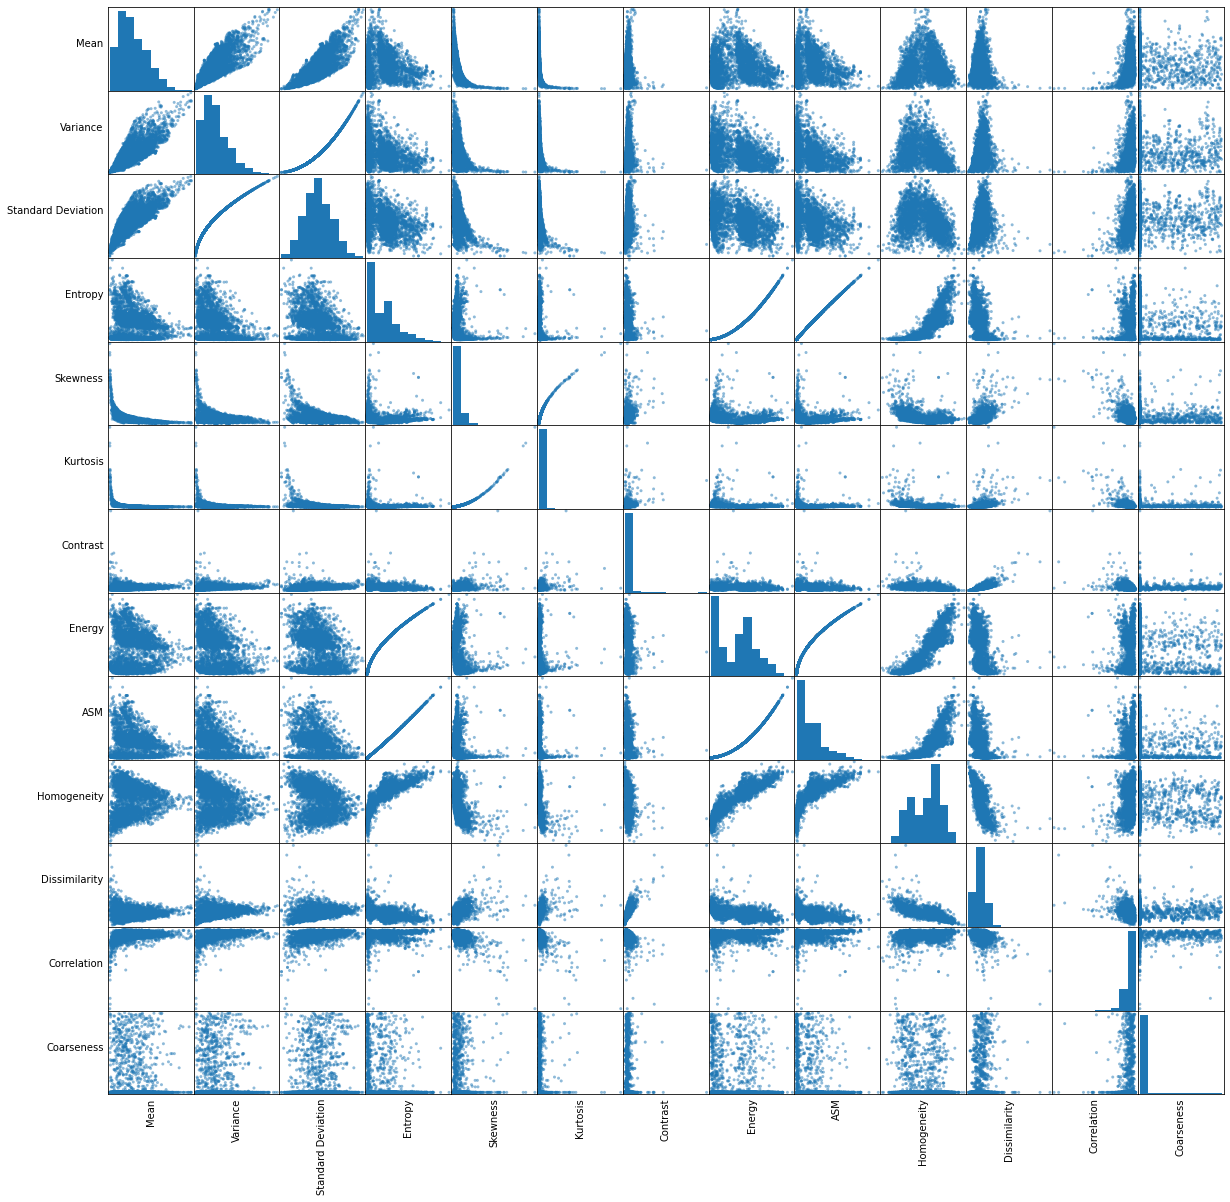

In [0]:
import pandas as pd
pd.DataFrame(base_df.take(5),columns=base_df.columns).transpose()
aux=[ind[0] for ind in base_df.dtypes if ind[1]=='double']
num = base_df.select(aux).toPandas()
ax = pd.plotting.scatter_matrix(num, figsize=(20, 20)); #;,alpha=0.5 way more legible than heatmap from seaborn
n = len(num.columns)
for i in range(n):
    h = ax[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.xaxis.label.set_va('top') #unne
    h.set_xticks(())
    v = ax[i, 0]
    v.yaxis.label.set_rotation(0) #We don't have to rotate those labels, they are horizontal
    v.yaxis.label.set_ha('right')
    v.set_yticks(())


In [0]:
from pyspark.ml.regression import LinearRegression
#from pyspark.ml.regression import LinearRegression, LinearRegressionSummary
from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.linalg import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler #unne

'''
vecAssembler = VectorAssembler(outputCol="features")

vecAssembler.setInputCols(["a", "b", "c"])

columns_to_scale = ["x", "y", "z"] ...
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(df)
scaledData = scalerModel.transform(df)'''

Out[95]: '\nvecAssembler = VectorAssembler(outputCol="features")\n\nvecAssembler.setInputCols(["a", "b", "c"])\n\ncolumns_to_scale = ["x", "y", "z"] ...\nassemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]\nscalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]\npipeline = Pipeline(stages=assemblers + scalers)\nscalerModel = pipeline.fit(df)\nscaledData = scalerModel.transform(df)'

*possible Scaler*

In [0]:
"""mms=MinMaxScaler(inputCol=['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'],outputCol=['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'])
model=mms.fit(base_df)
base_df=model.transform(base_df)
display(base_df)"""
#or just delete it altogether

Out[96]: "mms=MinMaxScaler(inputCol=['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'],outputCol=['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'])\nmodel=mms.fit(base_df)\nbase_df=model.transform(base_df)\ndisplay(base_df)"

*Stages and assembler*

this cell looks underwhelming but could be readily expanded should the data contain strings that would need to be transformed using OneHotEncoder and StringIndexer. Said transformations would become stages in our pipeline, thus ensuring quick implementation of both numeric and categorical values into one ready-to-go package

In [0]:
stages=[]
assembler=VectorAssembler(inputCols=['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'],outputCol='features')
stages+=[assembler]

#stages+=['Class']####


In [0]:
print(stages)

[VectorAssembler_240c49ccc3fd]

**PIPELINE**

In [0]:
pipe=Pipeline(stages=stages)
pl=pipe.fit(base_df)
df=pl.transform(base_df)
display(df)
selcol=['Class','features','Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness']
df=df.select(selcol)
display(df)

#output=assembler.transform(base_df)
#output.select('features','Class').show()

Class Mean Variance Standard Deviation Entropy Skewness Kurtosis Contrast Energy ASM Homogeneity Dissimilarity Correlation Coarseness features 0 6.53533935546875 619.587844574841 24.891521539971 0.109059009370733 4.27647702615029 18.9005747905553 98.6139705882353 0.293314496659804 0.086033393950794 0.530941131652007 4.47334558823529 0.981938696883038 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(6.53533935546875, 619.587844574841, 24.891521539971, 0.109059009370733, 4.27647702615029, 18.9005747905553, 98.6139705882353, 0.293314496659804, 0.086033393950794, 0.530941131652007, 4.47334558823529, 0.981938696883038, 7.45834073119875E-155)) 0 8.74996948242188 805.957633995078 28.3893929839135 0.266538306720193 3.71811562576237 14.4646175387718 63.8588158750813 0.475051295953323 0.225673733786932 0.651352027489261 3.22007156798959 0.988834395612519 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(8.74996948242188, 805.957633995078, 28.3893929839135, 0.266538306720193, 3.71811562576237, 14.4646175387718, 63.8588158750813, 0.475051295953323, 0.225673733786932, 0.651352027489261, 3.22007156798959, 0.988834395612519, 7.45834073119875E-155)) 1 7.34109497070313 1143.80821918438 33.8202338724081 0.001466811014785 5.06175041156417 26.4795631645533 81.8672059319178 0.031916712116093 0.001018676512302 0.268274889054872 5.98179979777553 0.978013692812984 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(7.34109497070313, 1143.80821918438, 33.8202338724081, 0.001466811014785, 5.06175041156417, 26.4795631645533, 81.8672059319178, 0.031916712116093, 0.001018676512302, 0.268274889054872, 5.98179979777553, 0.978013692812984, 7.45834073119875E-155)) 1 5.95814514160156 959.711984907359 30.9792185974301 0.001477124416674 5.67797740882281 33.4288453356089 151.229741019215 0.032023748977051 0.001025520498545 0.243850913161766 7.70091896407686 0.964189183043956 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(5.95814514160156, 959.711984907359, 30.9792185974301, 0.001477124416674, 5.67797740882281, 33.4288453356089, 151.229741019215, 0.032023748977051, 0.001025520498545, 0.243850913161766, 7.70091896407686, 0.964189183043956, 7.45834073119875E-155)) 0 7.31523132324219 729.540578978274 27.0100088666826 0.146760595840014 4.28322090823909 19.0791082932465 174.988755980861 0.343849413865669 0.118232419415764 0.501139540186341 6.83468899521531 0.972788726424128 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(7.31523132324219, 729.540578978274, 27.0100088666826, 0.146760595840014, 4.28322090823909, 19.0791082932465, 174.988755980861, 0.343849413865669, 0.118232419415764, 0.501139540186341, 6.83468899521531, 0.972788726424128, 7.45834073119875E-155)) 0 7.52410888671875 607.395257778402 24.6453901932674 0.214085625648148 3.7298861207408 14.4717360547478 105.077881619938 0.42158745340618 0.177735980869508 0.598169203005808 4.19314641744548 0.976484963476823 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(7.52410888671875, 607.395257778402, 24.6453901932674, 0.214085625648148, 3.7298861207408, 14.4717360547478, 105.077881619938, 0.42158745340618, 0.177735980869508, 0.598169203005808, 4.19314641744548, 0.976484963476823, 7.45834073119875E-155)) 0 12.3044128417969 922.746137739561 30.376736785566 0.128833098715211 2.9300947326401 8.96934763269485 115.203118415508 0.320674560600768 0.102832173816496 0.532292452741065 4.8803202697008 0.974745237490247 7.45834073119875E-155 Map(vectorType -> dense, length -> 13, values -> List(12.3044128417969, 922.746137739561, 30.376736785566, 0.128833098715211, 2.9300947326401, 8.96934763269485, 115.203118415508, 0.320674560600768, 0.102832173816496, 0.532292452741065, 4.8803202697008, 0.974745237490247, 7.45834073119875E-155)) 0 15.9294738769531 1069.95024757066 32.7100939706792 0.107657590137778 2.48400219180961 6.51588946409096 94.8742884250474 0.291321372548541 0.084

Class features Mean Variance Standard Deviation Entropy Skewness Kurtosis Contrast Energy ASM Homogeneity Dissimilarity Correlation Coarseness 0 Map(vectorType -> dense, length -> 13, values -> List(6.53533935546875, 619.587844574841, 24.891521539971, 0.109059009370733, 4.27647702615029, 18.9005747905553, 98.6139705882353, 0.293314496659804, 0.086033393950794, 0.530941131652007, 4.47334558823529, 0.981938696883038, 7.45834073119875E-155)) 6.53533935546875 619.587844574841 24.891521539971 0.109059009370733 4.27647702615029 18.9005747905553 98.6139705882353 0.293314496659804 0.086033393950794 0.530941131652007 4.47334558823529 0.981938696883038 7.45834073119875E-155 0 Map(vectorType -> dense, length -> 13, values -> List(8.74996948242188, 805.957633995078, 28.3893929839135, 0.266538306720193, 3.71811562576237, 14.4646175387718, 63.8588158750813, 0.475051295953323, 0.225673733786932, 0.651352027489261, 3.22007156798959, 0.988834395612519, 7.45834073119875E-155)) 8.74996948242188 805.957633995078 28.3893929839135 0.266538306720193 3.71811562576237 14.4646175387718 63.8588158750813 0.475051295953323 0.225673733786932 0.651352027489261 3.22007156798959 0.988834395612519 7.45834073119875E-155 1 Map(vectorType -> dense, length -> 13, values -> List(7.34109497070313, 1143.80821918438, 33.8202338724081, 0.001466811014785, 5.06175041156417, 26.4795631645533, 81.8672059319178, 0.031916712116093, 0.001018676512302, 0.268274889054872, 5.98179979777553, 0.978013692812984, 7.45834073119875E-155)) 7.34109497070313 1143.80821918438 33.8202338724081 0.001466811014785 5.06175041156417 26.4795631645533 81.8672059319178 0.031916712116093 0.001018676512302 0.268274889054872 5.98179979777553 0.978013692812984 7.45834073119875E-155 1 Map(vectorType -> dense, length -> 13, values -> List(5.95814514160156, 959.711984907359, 30.9792185974301, 0.001477124416674, 5.67797740882281, 33.4288453356089, 151.229741019215, 0.032023748977051, 0.001025520498545, 0.243850913161766, 7.70091896407686, 0.964189183043956, 7.45834073119875E-155)) 5.95814514160156 959.711984907359 30.9792185974301 0.001477124416674 5.67797740882281 33.4288453356089 151.229741019215 0.032023748977051 0.001025520498545 0.243850913161766 7.70091896407686 0.964189183043956 7.45834073119875E-155 0 Map(vectorType -> dense, length -> 13, values -> List(7.31523132324219, 729.540578978274, 27.0100088666826, 0.146760595840014, 4.28322090823909, 19.0791082932465, 174.988755980861, 0.343849413865669, 0.118232419415764, 0.501139540186341, 6.83468899521531, 0.972788726424128, 7.45834073119875E-155)) 7.31523132324219 729.540578978274 27.0100088666826 0.146760595840014 4.28322090823909 19.0791082932465 174.988755980861 0.343849413865669 0.118232419415764 0.501139540186341 6.83468899521531 0.972788726424128 7.45834073119875E-155 0 Map(vectorType -> dense, length -> 13, values -> List(7.52410888671875, 607.395257778402, 24.6453901932674, 0.214085625648148, 3.7298861207408, 14.4717360547478, 105.077881619938, 0.42158745340618, 0.177735980869508, 0.598169203005808, 4.19314641744548, 0.976484963476823, 7.45834073119875E-155)) 7.52410888671875 607.395257778402 24.6453901932674 0.214085625648148 3.7298861207408 14.4717360547478 105.077881619938 0.42158745340618 0.177735980869508 0.598169203005808 4.19314641744548 0.976484963476823 7.45834073119875E-155 0 Map(vectorType -> dense, length -> 13, values -> List(12.3044128417969, 922.746137739561, 30.376736785566, 0.128833098715211, 2.9300947326401, 8.96934763269485, 115.203118415508, 0.320674560600768, 0.102832173816496, 0.532292452741065, 4.8803202697008, 0.974745237490247, 7.45834073119875E-155)) 12.3044128417969 922.746137739561 30.376736785566 0.128833098715211 2.9300947326401 8.96934763269485 115.203118415508 0.320674560600768 0.102832173816496 0.532292452741065 4.8803202697008 0.974745237490247 7.45834073119875E-155 0 Map(vectorType -> dense, length -> 13, values -> List(15.9294738769531, 1069.95024757066, 32.7100939706792, 0.107657590137778, 2.48400219180961

In [0]:
pd.DataFrame(df.take(15),columns=df.columns).transpose() #5

Out[100]:

0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 
 
 
 
 Class 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 1 
 1 
 0 
 0 
 
 
 features 
 [6.53533935546875, 619.587844574841, 24.891521... 
 [8.74996948242188, 805.957633995078, 28.389392... 
 [7.34109497070313, 1143.80821918438, 33.820233... 
 [5.95814514160156, 959.711984907359, 30.979218... 
 [7.31523132324219, 729.540578978274, 27.010008... 
 [7.52410888671875, 607.395257778402, 24.645390... 
 [12.3044128417969, 922.746137739561, 30.376736... 
 [15.9294738769531, 1069.95024757066, 32.710093... 
 [19.9216156005859, 1166.12092201469, 34.148512... 
 [8.4761962890625, 1095.7851273195, 33.10264532... 
 [9.80461120605469, 1114.82965293078, 33.389064... 
 [12.3267822265625, 1150.6771443364, 33.9216323... 
 [10.1934661865234, 813.924363430001, 28.529359... 
 [7.15631103515625, 413.438221306825, 20.333180... 
 [5.29147338867188, 430.963765610282, 20.759666... 
 
 
 Mean 
 6.53534 
 8.74997 
 7.34109 
 5.95815 
 7.31523 
 7.52411 
 12.3044 
 15.9295 
 19.9216 
 8.4762 
 9.80461 
 12.3268 
 10.1935 
 7.15631 
 5.29147 
 
 
 Variance 
 619.588 
 805.958 
 1143.81 
 959.712 
 729.541 
 607.395 
 922.746 
 1069.95 
 1166.12 
 1095.79 
 1114.83 
 1150.68 
 813.924 
 413.438 
 430.964 
 
 
 Standard Deviation 
 24.8915 
 28.3894 
 33.8202 
 30.9792 
 27.01 
 24.6454 
 30.3767 
 32.7101 
 34.1485 
 33.1026 
 33.3891 
 33.9216 
 28.5294 
 20.3332 
 20.7597 
 
 
 Entropy 
 0.109059 
 0.266538 
 0.00146681 
 0.00147712 
 0.146761 
 0.214086 
 0.128833 
 0.107658 
 0.0949755 
 0.00300189 
 0.00243621 
 0.00376858 
 0.00977447 
 0.0818255 
 0.354116 
 
 
 Skewness 
 4.27648 
 3.71812 
 5.06175 
 5.67798 
 4.28322 
 3.72989 
 2.93009 
 2.484 
 2.12917 
 4.365 
 3.87273 
 3.62398 
 3.35913 
 3.17978 
 4.36918 
 
 
 Kurtosis 
 18.9006 
 14.4646 
 26.4796 
 33.4288 
 19.0791 
 14.4717 
 8.96935 
 6.51589 
 4.90584 
 19.6825 
 15.5529 
 14.7623 
 12.1817 
 10.2873 
 19.6319 
 
 
 Contrast 
 98.614 
 63.8588 
 81.8672 
 151.23 
 174.989 
 105.078 
 115.203 
 94.8743 
 93.8189 
 72.5888 
 66.2855 
 165.485 
 110.569 
 122.403 
 46.8643 
 
 
 Energy 
 0.293314 
 0.475051 
 0.0319167 
 0.0320237 
 0.343849 
 0.421587 
 0.320675 
 0.291321 
 0.272486 
 0.0456851 
 0.04114 
 0.051321 
 0.0832839 
 0.250908 
 0.55534 
 
 
 ASM 
 0.0860334 
 0.225674 
 0.00101868 
 0.00102552 
 0.118232 
 0.177736 
 0.102832 
 0.0848681 
 0.0742485 
 0.00208713 
 0.0016925 
 0.00263385 
 0.00693621 
 0.0629549 
 0.308402 
 
 
 Homogeneity 
 0.530941 
 0.651352 
 0.268275 
 0.243851 
 0.50114 
 0.598169 
 0.532292 
 0.532262 
 0.526644 
 0.361432 
 0.375618 
 0.385292 
 0.470426 
 0.583889 
 0.721321 
 
 
 Dissimilarity 
 4.47335 
 3.22007 
 5.9818 
 7.70092 
 6.83469 
 4.19315 
 4.88032 
 4.24205 
 4.02717 
 4.59079 
 4.62676 
 5.21544 
 3.5668 
 3.5525 
 2.37364 
 
 
 Correlation 
 0.981939 
 0.988834 
 0.978014 
 0.964189 
 0.972789 
 0.976485 
 0.974745 
 0.976774 
 0.97431 
 0.96783 
 0.96875 
 0.958601 
 0.946884 
 0.938238 
 0.987914 
 
 
 Coarseness 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155 
 7.45834e-155

**random split - generating train&test sets**

In [0]:
train, test = df.randomSplit([0.7, 0.3],seed=1000) #, seed = 2000?, changed from 0.8,0.2
print("Training Data Count: " + str(train.count()))
train.groupBy('Class').count().show()
print("Test Data Count: " + str(test.count()))
test.groupBy('Class').count().show()

Training Data Count: 2570
+-----+-----+
Class|count|
+-----+-----+
 1| 1128|
 0| 1442|
+-----+-----+

Test Data Count: 1192
+-----+-----+
Class|count|
+-----+-----+
 1| 555|
 0| 637|
+-----+-----+

*LOG REG*

In [0]:
from pyspark.ml.classification import LogisticRegression

lr=LogisticRegression(featuresCol='features',labelCol='Class',maxIter=1) #of course we can increas maxIter num
LR=lr.fit(train)


Out[103]:

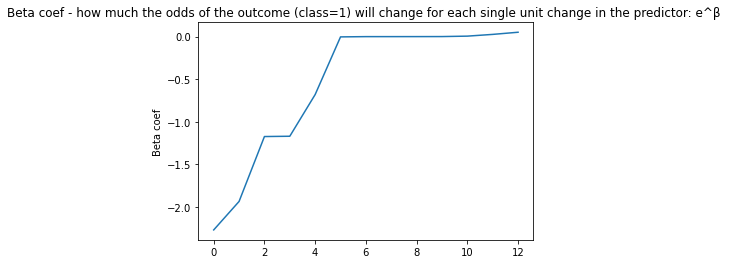

Text(0, 0.5, 'Beta coef')

In [0]:
import matplotlib .pyplot as plt
import numpy as np
beta=np.sort(LR.coefficients) #or...
#beta=(LR.coefficients)
plt.title("Beta coef - how much the odds of the outcome (class=1) will change for each single unit change in the predictor: e^β ")
plt.plot(beta)
plt.ylabel('Beta coef')
#plt.xlabel()


because we have a binary classification we can use .summary as described in spark documentation. ROC stands for Receiver Operating Characteristics which plots True positive rate (TPR=TP/TP+FN) against  false positive rate (FPR=FP/FN+TP). So it shows probability of detection vs probability of false alarm. 

https://spark.apache.org/docs/latest/ml-classification-regression.html

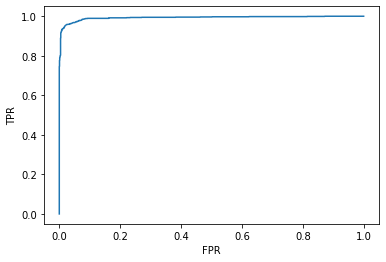

0.9927501082027542

In [0]:
sum=LR.summary
ROC=sum.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print (sum.areaUnderROC)

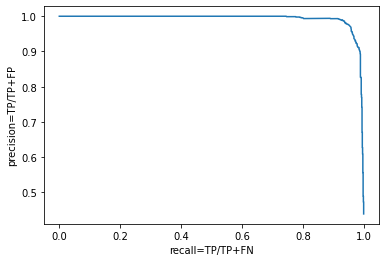

In [0]:

pr=sum.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.xlabel("recall=TP/TP+FN")
plt.ylabel("precision=TP/TP+FP")
plt.show()

In [0]:

predictions = LR.transform(test)
predictions.select('Class','rawPrediction',"prediction",'probability').show(722)  # 'Mean', 'Variance', 'Standard Deviation','Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'

+-----+--------------------+----------+--------------------+
Class| rawPrediction|prediction| probability|
+-----+--------------------+----------+--------------------+
 0|[3.18614809077754...| 0.0|[0.96030966491590...|
 0|[2.65048209735805...| 0.0|[0.93404069810270...|
 0|[2.28424818253331...| 0.0|[0.90756405105840...|
 0|[2.76970325198231...| 0.0|[0.94101651786073...|
 0|[2.55489822655227...| 0.0|[0.92790189345825...|
 0|[2.92515509879622...| 0.0|[0.94907602630608...|
 0|[2.25151533923336...| 0.0|[0.90478116502327...|
 0|[2.07997170144070...| 0.0|[0.88894123955222...|
 0|[2.19286320910069...| 0.0|[0.89960679151128...|
 0|[2.08633222260554...| 0.0|[0.88956762845764...|
 0|[3.36852782856443...| 0.0|[0.96670634158319...|
 0|[2.59422032992653...| 0.0|[0.93048868235602...|
 0|[2.17970880928708...| 0.0|[0.89841249894264...|
 0|[1.94810595297722...| 0.0|[0.87523996836123...|
 0|[1.58579814072091...| 0.0|[0.83002410938238...|
 0|[2.40723837069248...| 0.0|[0.91737760271810...|
 0|[2.15903258720246...| 0.0|[0.89650982644685...|
 0|[2.18348850040566...| 0.0|[0.89875694272905...|
 0|[2.81891698591475...| 0.0|[0.94368954314996...|
 0|[2.17704947908400...| 0.0|[0.89816953129113...|
 0|[2.53324439798659...| 0.0|[0.92643976242861...|
 0|[2.47708397119535...| 0.0|[0.92251962502001...|
 0|[2.13434679347987...| 0.0|[0.89419695828222...|
 0|[1.70173919088109...| 0.0|[0.84576174676042...|
 0|[2.15658331477464...| 0.0|[0.89628236226448...|
 0|[2.41183529403094...| 0.0|[0.91772536298509...|
 0|[3.18670429696409...| 0.0|[0.96033085929471...|
 0|[2.37165619183195...| 0.0|[0.91464025401950...|
 0|[2.19583897359186...| 0.0|[0.89987522652833...|
 0|[2.52907726100754...| 0.0|[0.92615527053321...|
 0|[2.15155313008122...| 0.0|[0.89581382185177...|
 0|[2.13128625715837...| 0.0|[0.89390705521333...|
 0|[1.87212763284010...| 0.0|[0.86670427042071...|
 0|[2.06071216715843...| 0.0|[0.88702555673970...|
 0|[2.16329163881392...| 0.0|[0.89690431428454...|
 0|[2.03350360699306...| 0.0|[0.88427010775886...|
 0|[2.41025025902852...| 0.0|[0.91760560482331...|
 0|[2.54052622223090...| 0.0|[0.92693447401473...|
 0|[2.09318565262311...| 0.0|[0.89023909393632...|
 0|[2.06915526599317...| 0.0|[0.88786888919817...|
 0|[2.19374152644219...| 0.0|[0.89968608838884...|
 0|[1.92562238825010...| 0.0|[0.87276409226629...|
 0|[2.14710765484174...| 0.0|[0.89539818868653...|
 0|[2.92853812848763...| 0.0|[0.94923928239515...|
 0|[1.98862574855203...| 0.0|[0.87959767250500...|
 0|[2.03525215649743...| 0.0|[0.88444892797013...|
 0|[2.46645733920833...| 0.0|[0.92175664490577...|
 0|[1.79883681862032...| 0.0|[0.85800728280226...|
 0|[2.14544971938433...| 0.0|[0.89524280417410...|
 0|[1.85505318794378...| 0.0|[0.86471931419862...|
 0|[2.01211923262334...| 0.0|[0.88206365892984...|
 0|[1.62029816773606...| 0.0|[0.83483624667931...|
 0|[2.01831538370921...| 0.0|[0.88270670381969...|
 0|[1.85313624518582...| 0.0|[0.86449491375633...|
 0|[1.63551440235957...| 0.0|[0.83692365692186...|
 0|[2.55526130938173...| 0.0|[0.92792617991499...|
 0|[1.82546672749468...| 0.0|[0.86122079891069...|
 0|[2.37253143283731...| 0.0|[0.91470856231877...|
 0|[1.64810960652854...| 0.0|[0.83863539464036...|
 0|[2.06285645236718...| 0.0|[0.88724025991016...|
 0|[1.87389399542048...| 0.0|[0.86690820257159...|
 0|[2.11077266213065...| 0.0|[0.89194582378805...|
 0|[1.81821136185066...| 0.0|[0.86035136620104...|
 0|[2.44117475609447...| 0.0|[0.91991367775387...|
 0|[2.09284029491926...| 0.0|[0.89020534329544...|
 0|[2.18252334570261...| 0.0|[0.89866908669742...|
 0|[2.02316686937326...| 0.0|[0.88320807332202...|
 0|[1.84728413169579...| 0.0|[0.86380791349042...|
 0|[2.06141198736732...| 0.0|[0.88709566758325...|
 0|[1.69725197595305...| 0.0|[0.84517548628907...|
 0|[1.89985637763421...| 0.0|[0.86987526955683...|
 0|[1.96389197431807...| 0.0|[0.87695353644276...|
 0|[3.37428766959525...| 0.0|[0.96689122565726...|
 0|[1.80535356807866...| 0.0|[0.85879937272376...|
 0|[2.18350448030741...| 0.0|[0.89875839677739...|
 0|[2.0

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class')
print('LOGREG - Test Area Under ROC', evaluator.evaluate(predictions))

LOGREG - Test Area Under ROC 0.9898680470109021

In [0]:
#failed linear

"""
from pyspark.ml.regression import LinearRegression

linr=LinearRegression(featuresCol='features',labelCol='Class') #,maxIter=10
LINR=lr.fit(train)
predictions = LINR.transform(test)
predictions.select('Mean', 'Variance', 'Standard Deviation','Class','rawPrediction',"prediction",'probability').show(5)  # 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class')
print('LINREG - Test Area Under ROC', evaluator.evaluate(predictions))

"""

Out[108]: '\nfrom pyspark.ml.regression import LinearRegression\n\nlinr=LinearRegression(featuresCol=\'features\',labelCol=\'Class\') #,maxIter=10\nLINR=lr.fit(train)\npredictions = LINR.transform(test)\npredictions.select(\'Mean\', \'Variance\', \'Standard Deviation\',\'Class\',\'rawPrediction\',"prediction",\'probability\').show(5) # \'Skewness\', \'Kurtosis\', \'Contrast\', \'Energy\', \'ASM\', \'Homogeneity\', \'Dissimilarity\', \'Correlation\', \'Coarseness\'\nevaluator = BinaryClassificationEvaluator(rawPredictionCol=\'rawPrediction\', labelCol=\'Class\')\nprint(\'LINREG - Test Area Under ROC\', evaluator.evaluate(predictions))\n\n'

*DECISION TREE CLASIFIER*

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier


In [0]:
dtc=DecisionTreeClassifier(featuresCol='features',labelCol='Class',maxDepth=5)
DTC=dtc.fit(train)
predictions=DTC.transform(test)
predictions.select('Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness').show(5)

+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
 Mean| Variance|Standard Deviation| Entropy| Skewness| Kurtosis| Contrast| Energy| ASM| Homogeneity| Dissimilarity| Correlation| Coarseness|
+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
0.307815551757812|10.2153898526946| 3.19615235129594|0.354311538326785|10.9450349168516|124.787253064899|64.4358803986711|0.555279811972505|0.308335669584221|0.730989409598133| 2.57940199335548| 0.88212481908464|7.45834073119956E...|
0.751556396484375|26.0856798761599| 5.10741420644144|0.237061374384786| 7.6396186255158|64.1620771938391|63.4907407407407|0.445189528703674|0.198193716467399|0.677188261986638| 2.59472934472934|0.902899197844918|7.45834073119875E...|
0.854660034179688|38.6028975386113| 6.21312301009817|0.189241531674144|7.56341065486765| 58.259537421975|111.709692671395| 0.39363256843191|0.154946598930302|0.644802010697303| 3.71063829787234|0.896439615502052|7.45834073119875E...|
 1.09371948242188|11.3959144229586| 3.37578352726573|0.179231251407331|3.64719010883242|14.6512150376029|3.19473319473319|0.376623097086826|0.141844957259273|0.790120235345191|0.681120681120681|0.957850675308719|7.45834073119875E...|
 1.11787414550781|39.9919671954202| 6.32392023948912|0.203139334428764|5.95968401612157|36.0087154247339|64.5859619210003|0.407704855359846|0.166223249083993|0.705089674839605| 2.73543620346689|0.909452751379984|7.45834073119875E...|
+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
only showing top 5 rows

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class')
print('DTC - Test Area Under ROC', evaluator.evaluate(predictions))

DTC - Test Area Under ROC 0.9687951687951687

a decision tree obtains considerably worse results than log reg, even at its minimal iterations. It's not surprising given multitude of variables. A random forest employs not one but a large number of individual trees so it's only natural we check that method next

*Random Forest Classifier*

In [0]:
from pyspark.ml.classification import RandomForestClassifier
rfc=RandomForestClassifier(featuresCol='features',labelCol='Class',maxDepth=5)
rfc.setNumTrees(5)
RFC=rfc.fit(train)
predictions=RFC.transform(test)
predictions.select('Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness').show(5)

+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
 Mean| Variance|Standard Deviation| Entropy| Skewness| Kurtosis| Contrast| Energy| ASM| Homogeneity| Dissimilarity| Correlation| Coarseness|
+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
0.307815551757812|10.2153898526946| 3.19615235129594|0.354311538326785|10.9450349168516|124.787253064899|64.4358803986711|0.555279811972505|0.308335669584221|0.730989409598133| 2.57940199335548| 0.88212481908464|7.45834073119956E...|
0.751556396484375|26.0856798761599| 5.10741420644144|0.237061374384786| 7.6396186255158|64.1620771938391|63.4907407407407|0.445189528703674|0.198193716467399|0.677188261986638| 2.59472934472934|0.902899197844918|7.45834073119875E...|
0.854660034179688|38.6028975386113| 6.21312301009817|0.189241531674144|7.56341065486765| 58.259537421975|111.709692671395| 0.39363256843191|0.154946598930302|0.644802010697303| 3.71063829787234|0.896439615502052|7.45834073119875E...|
 1.09371948242188|11.3959144229586| 3.37578352726573|0.179231251407331|3.64719010883242|14.6512150376029|3.19473319473319|0.376623097086826|0.141844957259273|0.790120235345191|0.681120681120681|0.957850675308719|7.45834073119875E...|
 1.11787414550781|39.9919671954202| 6.32392023948912|0.203139334428764|5.95968401612157|36.0087154247339|64.5859619210003|0.407704855359846|0.166223249083993|0.705089674839605| 2.73543620346689|0.909452751379984|7.45834073119875E...|
+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
only showing top 5 rows

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class')
print('RFC - Test Area Under ROC', evaluator.evaluate(predictions))

RFC - Test Area Under ROC 0.9939228082085225

*Gradient boosted classifier*

In [0]:
from pyspark.ml.classification import GBTClassifier
gbtc=GBTClassifier(featuresCol='features', labelCol='Class',maxIter=20)
GBTC=gbtc.fit(train)
predictions=GBTC.transform(test)
predictions.select('Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness').show(5)

+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
 Mean| Variance|Standard Deviation| Entropy| Skewness| Kurtosis| Contrast| Energy| ASM| Homogeneity| Dissimilarity| Correlation| Coarseness|
+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
0.307815551757812|10.2153898526946| 3.19615235129594|0.354311538326785|10.9450349168516|124.787253064899|64.4358803986711|0.555279811972505|0.308335669584221|0.730989409598133| 2.57940199335548| 0.88212481908464|7.45834073119956E...|
0.751556396484375|26.0856798761599| 5.10741420644144|0.237061374384786| 7.6396186255158|64.1620771938391|63.4907407407407|0.445189528703674|0.198193716467399|0.677188261986638| 2.59472934472934|0.902899197844918|7.45834073119875E...|
0.854660034179688|38.6028975386113| 6.21312301009817|0.189241531674144|7.56341065486765| 58.259537421975|111.709692671395| 0.39363256843191|0.154946598930302|0.644802010697303| 3.71063829787234|0.896439615502052|7.45834073119875E...|
 1.09371948242188|11.3959144229586| 3.37578352726573|0.179231251407331|3.64719010883242|14.6512150376029|3.19473319473319|0.376623097086826|0.141844957259273|0.790120235345191|0.681120681120681|0.957850675308719|7.45834073119875E...|
 1.11787414550781|39.9919671954202| 6.32392023948912|0.203139334428764|5.95968401612157|36.0087154247339|64.5859619210003|0.407704855359846|0.166223249083993|0.705089674839605| 2.73543620346689|0.909452751379984|7.45834073119875E...|
+-----------------+----------------+------------------+-----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+--------------------+
only showing top 5 rows

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class') #,metricName='areaUnderPR
print('GBTC - Test Area Under ROC', evaluator.evaluate(predictions))




GBTC - Test Area Under ROC 0.9941222226936504

**Grid builder & CrosVal**

In [0]:
from pyspark.ml.tuning import ParamGridBuilder,CrossValidator
pg=(ParamGridBuilder()\
    .addGrid(gbtc.maxDepth,[2,4,6])\
    .addGrid(gbtc.maxBins,[20,30])\
    .addGrid(gbtc.maxIter,[5,20]).build()) 


In [0]:
#this takes 12 minutes on 8gb 4 core,  [2,4,6,8,10] , 20,50, 5,20 4 fold -> 0.9952890095747237
#this takes 5 minutes on 8gb 4 core,  [2,4,6] , 20,30, 5,20 4fold -> 0.9952890095747237
cv=CrossValidator(estimator=gbtc,estimatorParamMaps=pg,evaluator=evaluator,numFolds=4)
CV=cv.fit(train)

In [0]:
predictions=CV.transform(test)
evaluator.evaluate(predictions)

Out[124]: 0.9952890095747237

THIS IS THE BEST RESULT!

*multilayer perceptron*

In [0]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
# specify layers for the neural network:
# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 (classes)
layers = [13,16, 2]

# create the trainer and set its parameters
mlpc = MultilayerPerceptronClassifier(featuresCol='features', labelCol='Class',maxIter=100, layers=layers, blockSize=50,seed=1000)

# train the model
MLPC = mlpc.fit(train)

# compute accuracy on the test set



In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictions = MLPC.transform(test)
predictions.select('Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness', "Class")
#evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class')
evaluator=MulticlassClassificationEvaluator(labelCol='Class',predictionCol='prediction',metricName='f1')
print('MLPC - f1 score', evaluator.evaluate(predictions))

MLPC - f1 score 0.8907626315658006

*naive bayes*
doesn't work good/at all, maybe we shouldn't be surprised

In [0]:
from pyspark.ml.classification import NaiveBayes
"""nb = NaiveBayes(featuresCol='features', labelCol='Class',smoothing=1.0, modelType="multinomial")
NB = nb.fit(train)
predictions = NB.transform(test)
predictions.select('Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness').show(5)
"""

"""nb=NaiveBayes(smoothing=1.0,modelType='multinomial')
pipeline=Pipeline(stages=[assembler,nb])
NB=nb.fit(train)
predictions=NB.transform(test)
predictions.show(5)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="precision")
accuracy = evaluator.evaluate(predictions)
print ("Accuracy: ", accuracy)


"""

--------------------------------------------------------------------------- 
 IllegalArgumentException Traceback (most recent call last)
 <command-1177699384110367> in <module> 
 8 nb = NaiveBayes ( smoothing = 1.0 , modelType = 'multinomial' ) 
 9 pipeline = Pipeline ( stages = [ assembler , nb ] ) 
 ---> 10 NB = nb . fit ( train ) 
 11 predictions = NB . transform ( test ) 
 12 predictions . show ( 5 ) 

 /databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py in patched_method (self, *args, **kwargs) 
 28 call_succeeded = False 
 29 try : 
 ---> 30 result = original_method ( self , * args , ** kwargs ) 
 31 call_succeeded = True 
 32 return result

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 159 return self . copy ( params ) . _fit ( dataset ) 
 160 else : 
 --> 161 return self . _fit ( dataset ) 
 162 else : 
 163 raise ValueError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit (self, dataset) 
 333 
 334 def _fit ( self , dataset ) : 
 --> 335 java_model = self . _fit_java ( dataset ) 
 336 model = self . _create_model ( java_model ) 
 337 return self . _copyValues ( model ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _fit_java (self, dataset) 
 330 """
 331 self . _transfer_params_to_java ( ) 
 --> 332 return self . _java_obj . fit ( dataset . _jdf ) 
 333 
 334 def _fit ( self , dataset ) : 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 121 # Hide where the exception came from that shows a non-Pythonic 
 122 # JVM exception message. 
 --> 123 raise converted from None 
 124 else : 
 125 raise 

 IllegalArgumentException : label does not exist. Available: Class, features, Mean, Variance, Standard Deviation, Entropy, Skewness, Kurtosis, Contrast, Energy, ASM, Homogeneity, Dissimilarity, Correlation, Coarseness

In [0]:
"""
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='Class')
print('NB - Test Area Under ROC', evaluator.evaluate(predictions))
"""

NB - Test Area Under ROC 0.2058438344152631

**grid builder** just a backup

In [0]:
"""from pyspark.ml.tuning import ParamGridBuilder,CrossValidator
pg=(ParamGridBuilder()\
    .addGrid(gbtc.maxDepth,[2,4,6])\
    .addGrid(gbtc.maxBins,[10,20])\
    .addGrid(gbtc.maxIter,[5,10]).build()) 

cv=CrossValidator(estimator=gbtc,estimatorParamMaps=pg,evaluator=evaluator,numFolds=3)
CV=cv.fit(train)
predictions=CV.transform(test)
evaluator=evaluator(predictions)
""""""


File "<command-173483925200265>" , line 4 
 .addGrid(gbtc.maxBins,[10,20])\#20,60 
 
^
 SyntaxError : unexpected character after line continuation character

LIN REG

In [0]:
assembler=VectorAssembler(inputCols=['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness'],outputCol='features')
output=assembler.transform(base_df)


output.select('features','Class').show()



+--------------------+-----+
 features|Class|
+--------------------+-----+
[6.53533935546875...| 0|
[8.74996948242188...| 0|
[7.34109497070313...| 1|
[5.95814514160156...| 1|
[7.31523132324219...| 0|
[7.52410888671875...| 0|
[12.3044128417969...| 0|
[15.9294738769531...| 0|
[19.9216156005859...| 0|
[8.4761962890625,...| 1|
[9.80461120605469...| 1|
[12.3267822265625...| 1|
[10.1934661865234...| 1|
[7.15631103515625...| 0|
[5.29147338867188...| 0|
[12.7739410400391...| 1|
[15.3175201416016...| 1|
[6.24671936035156...| 0|
[5.45042419433594...| 0|
[8.333740234375,4...| 0|
+--------------------+-----+
only showing top 20 rows

In [0]:
final_data=output.select('features','Class')
train,test=final_data.randomSplit([0.8,0.2])
train.describe().show()

+-------+------------------+
summary| Class|
+-------+------------------+
 count| 2995|
 mean|0.4430717863105175|
 stddev|0.4968315573526009|
 min| 0|
 max| 1|
+-------+------------------+

In [0]:
test.describe().show()

+-------+------------------+
summary| Class|
+-------+------------------+
 count| 767|
 mean|0.4641460234680574|
 stddev|0.4990382599717467|
 min| 0|
 max| 1|
+-------+------------------+

In [0]:
lr=LinearRegression(featuresCol='features',labelCol='Class')
#pass train to train model
trained=lr.fit(train)
#evaluating model trained for Rsquared error
results=trained.evaluate(train)
  
print('Rsquared Error :',results.r2)
print('Rsquared Error :',results.rootMeanSquaredError)

Rsquared Error : 0.8723630164375553
Rsquared Error : 0.1774699895991315

In [0]:
unlabeled=test.select('features')
display(unlabeled)

features Map(vectorType -> dense, length -> 13, values -> List(0.104171752929688, 14.5939509677345, 3.82020300085408, 0.030357489336647, 36.9312940533355, 1371.6400603465, 102.571428571429, 0.146771761975452, 0.021541950113379, 0.227912787324397, 7.42857142857143, 0.549426249103514, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.134689331054688, 17.1713333239304, 4.14383075474016, 0.015571072960273, 31.9300938988983, 1050.86638788877, 85.5625, 0.104231750500987, 0.0108642578125, 0.202735586374603, 7.40625, 0.928906631937894, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.19293212890625, 14.7301852871474, 3.83799235110591, 0.009143321379077, 20.4089670508325, 425.102082038805, 28.9230769230769, 0.079807048705056, 0.006369165023011, 0.249985601906762, 4.07692307692308, 0.899544671930874, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.228790283203125, 22.3130660723317, 4.7236708259924, 0.013189502545237, 20.8244032732859, 436.306125844715, 11.5874125874126, 0.096010700823399, 0.0092180546726, 0.37584840862404, 2.48251748251748, 0.898634772938786, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.266128540039062, 28.679026072057, 5.35528020481254, 0.006599336642465, 21.8965177669692, 509.897975062332, 384.043209876543, 0.067760797531173, 0.004591525682061, 0.105489790279749, 15.5740740740741, 0.830383313839034, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.3072509765625, 45.6888597956122, 6.75935350426446, 0.027946308112156, 22.3605826369197, 506.299062184411, 444.839160839161, 0.141770174354638, 0.020098782336545, 0.373127614121367, 8.36363636363636, 0.914460093919671, 7.45834073119983E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.383682250976562, 49.8397558549327, 7.05972774651634, 0.004998846661386, 19.6164147177412, 402.631484460786, 188.359375, 0.058925565098879, 0.003472222222222, 0.163295208112012, 10.0677083333333, 0.920045063776011, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.467910766601563, 87.7667534044646, 9.36839118549523, 0.044348174896222, 21.0327433496903, 457.244577164306, 3382.57416267943, 0.181786700875721, 0.033046404615279, 0.306920409733957, 27.8277511961722, 0.757638184656337, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.501571655273438, 58.5026192920127, 7.64870049694801, 0.004717642628325, 16.017549228671, 263.471516498837, 273.792387543253, 0.057276627533726, 0.003280612061637, 0.258870099416197, 8.16608996539792, 0.865793040781192, 7.45834073119903E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.560440063476563, 54.9068214795897, 7.40991372956458, 0.017778206925151, 13.717653221939, 193.570862609804, 274.275362318841, 0.11321779367399, 0.012818268804406, 0.31528887356266, 7.60869565217391, 0.887332621547055, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.69378662109375, 79.355562825773, 8.90817393329144, 0.003995010480683, 13.9323655268852, 206.397243391657, 192.480676328502, 0.052699092341235, 0.00277719433359, 0.259437974889814, 8.55314009661836, 0.918834858376637, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.74969482421875, 101.841108028915, 10.0916355477651, 0.008181376966921, 14.8150597633488, 232.38866912914, 516.8125, 0.075663729752108, 0.005725, 0.324366169656793, 12.5975, 0.896535442495813, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.770980834960938, 164.805324899725, 12.8376526242038, 0.008114281372905, 16.92571391977, 289.741800562743, 138.733031674208, 0.075377064474922, 0.005681701848857, 0.183045519605621, 8.55203619909502, 0.878611129274832, 7.45834073119875E-155)) Map(vectorType -> dense, length -> 13, values -> List(0.77410888671875, 71.0323478209687, 8.42806904462515, 0.004087398083387, 12.1115562184276, 157.781211600928, 

In [0]:
predictions=trained.transform(unlabeled)
display(predictions)


features prediction Map(vectorType -> dense, length -> 13, values -> List(0.104171752929688, 14.5939509677345, 3.82020300085408, 0.030357489336647, 36.9312940533355, 1371.6400603465, 102.571428571429, 0.146771761975452, 0.021541950113379, 0.227912787324397, 7.42857142857143, 0.549426249103514, 7.45834073119875E-155)) 0.10406716432727517 Map(vectorType -> dense, length -> 13, values -> List(0.134689331054688, 17.1713333239304, 4.14383075474016, 0.015571072960273, 31.9300938988983, 1050.86638788877, 85.5625, 0.104231750500987, 0.0108642578125, 0.202735586374603, 7.40625, 0.928906631937894, 7.45834073119875E-155)) 0.9974309287802715 Map(vectorType -> dense, length -> 13, values -> List(0.19293212890625, 14.7301852871474, 3.83799235110591, 0.009143321379077, 20.4089670508325, 425.102082038805, 28.9230769230769, 0.079807048705056, 0.006369165023011, 0.249985601906762, 4.07692307692308, 0.899544671930874, 7.45834073119875E-155)) 1.2054562560090474 Map(vectorType -> dense, length -> 13, values -> List(0.228790283203125, 22.3130660723317, 4.7236708259924, 0.013189502545237, 20.8244032732859, 436.306125844715, 11.5874125874126, 0.096010700823399, 0.0092180546726, 0.37584840862404, 2.48251748251748, 0.898634772938786, 7.45834073119875E-155)) 1.1549576718324903 Map(vectorType -> dense, length -> 13, values -> List(0.266128540039062, 28.679026072057, 5.35528020481254, 0.006599336642465, 21.8965177669692, 509.897975062332, 384.043209876543, 0.067760797531173, 0.004591525682061, 0.105489790279749, 15.5740740740741, 0.830383313839034, 7.45834073119875E-155)) 0.7769126531225721 Map(vectorType -> dense, length -> 13, values -> List(0.3072509765625, 45.6888597956122, 6.75935350426446, 0.027946308112156, 22.3605826369197, 506.299062184411, 444.839160839161, 0.141770174354638, 0.020098782336545, 0.373127614121367, 8.36363636363636, 0.914460093919671, 7.45834073119983E-155)) 1.0750672360928428 Map(vectorType -> dense, length -> 13, values -> List(0.383682250976562, 49.8397558549327, 7.05972774651634, 0.004998846661386, 19.6164147177412, 402.631484460786, 188.359375, 0.058925565098879, 0.003472222222222, 0.163295208112012, 10.0677083333333, 0.920045063776011, 7.45834073119875E-155)) 1.0656730023575818 Map(vectorType -> dense, length -> 13, values -> List(0.467910766601563, 87.7667534044646, 9.36839118549523, 0.044348174896222, 21.0327433496903, 457.244577164306, 3382.57416267943, 0.181786700875721, 0.033046404615279, 0.306920409733957, 27.8277511961722, 0.757638184656337, 7.45834073119875E-155)) 2.832693864630888 Map(vectorType -> dense, length -> 13, values -> List(0.501571655273438, 58.5026192920127, 7.64870049694801, 0.004717642628325, 16.017549228671, 263.471516498837, 273.792387543253, 0.057276627533726, 0.003280612061637, 0.258870099416197, 8.16608996539792, 0.865793040781192, 7.45834073119903E-155)) 1.1293719453841504 Map(vectorType -> dense, length -> 13, values -> List(0.560440063476563, 54.9068214795897, 7.40991372956458, 0.017778206925151, 13.717653221939, 193.570862609804, 274.275362318841, 0.11321779367399, 0.012818268804406, 0.31528887356266, 7.60869565217391, 0.887332621547055, 7.45834073119875E-155)) 0.9886280676022855 Map(vectorType -> dense, length -> 13, values -> List(0.69378662109375, 79.355562825773, 8.90817393329144, 0.003995010480683, 13.9323655268852, 206.397243391657, 192.480676328502, 0.052699092341235, 0.00277719433359, 0.259437974889814, 8.55314009661836, 0.918834858376637, 7.45834073119875E-155)) 1.0645430064657162 Map(vectorType -> dense, length -> 13, values -> List(0.74969482421875, 101.841108028915, 10.0916355477651, 0.008181376966921, 14.8150597633488, 232.38866912914, 516.8125, 0.075663729752108, 0.005725, 0.324366169656793, 12.5975, 0.896535442495813, 7.45834073119875E-155)) 1.0262682048081233 Map(vectorType -> dense, length -> 13, values -> List(0.770980834960938, 164.805324899725, 12.8376526242038, 0.008114281372905, 16.92571391977, 289.741800562743, 138.733031674208, 0.075377064474922, 0.005681701848857, 0.18

In [0]:
aux=trained.evaluate(test)
print (aux.r2)

0.8543063965739462

In [0]:
'''columns_to_scale = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness']
assemblers = [VectorAssembler(inputCols=[col], outputCol=col) for col in columns_to_scale]  # + "_vec"
scalers = [MinMaxScaler(inputCol=col, outputCol=col + "_scaled") for col in columns_to_scale] #+ "_vec"
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(data)
scaledData = scalerModel.transform(data)
'''



--------------------------------------------------------------------------- 
 IllegalArgumentException Traceback (most recent call last)
 <command-2041984463189389> in <module> 
 3 scalers = [ MinMaxScaler ( inputCol = col , outputCol = col + "_scaled" ) for col in columns_to_scale ] #+ "_vec" 
 4 pipeline = Pipeline ( stages = assemblers + scalers ) 
 ----> 5 scalerModel = pipeline . fit ( data ) 
 6 scaledData = scalerModel . transform ( data ) 
 7 

 /databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py in patched_method (self, *args, **kwargs) 
 28 call_succeeded = False 
 29 try : 
 ---> 30 result = original_method ( self , * args , ** kwargs ) 
 31 call_succeeded = True 
 32 return result

 /databricks/spark/python/pyspark/ml/base.py in fit (self, dataset, params) 
 159 return self . copy ( params ) . _fit ( dataset ) 
 160 else : 
 --> 161 return self . _fit ( dataset ) 
 162 else : 
 163 raise ValueError("Params must be either a param map or a list/tuple of param maps, "

 /databricks/spark/python/pyspark/ml/pipeline.py in _fit (self, dataset) 
 110 if isinstance ( stage , Transformer ) : 
 111 transformers . append ( stage ) 
 --> 112 dataset = stage . transform ( dataset ) 
 113 else : # must be an Estimator 
 114 model = stage . fit ( dataset ) 

 /databricks/spark/python/pyspark/ml/base.py in transform (self, dataset, params) 
 215 return self . copy ( params ) . _transform ( dataset ) 
 216 else : 
 --> 217 return self . _transform ( dataset ) 
 218 else : 
 219 raise ValueError ( "Params must be a param map but got %s." % type ( params ) ) 

 /databricks/spark/python/pyspark/ml/wrapper.py in _transform (self, dataset) 
 348 def _transform ( self , dataset ) : 
 349 self . _transfer_params_to_java ( ) 
 --> 350 return DataFrame ( self . _java_obj . transform ( dataset . _jdf ) , dataset . sql_ctx ) 
 351 
 352 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1302 
 1303 answer = self . gateway_client . send_command ( command ) 
 -> 1304 return_value = get_return_value(
 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 121 # Hide where the exception came from that shows a non-Pythonic 
 122 # JVM exception message. 
 --> 123 raise converted from None 
 124 else : 
 125 raise 

 IllegalArgumentException : Output column Mean already exists.